# APIs Lab
In this lab we will practice using APIs to retrieve and store data.

In [1]:
# Imports at the top
import json
import urllib
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1: Get Data From Sheetsu

[Sheetsu](https://sheetsu.com/) is an online service that allows you to access any Google spreadsheet from an API. This can be a very handy way to share a dataset with colleagues as well as to create a mini centralized data storage, that is simpler to edit than a database.

A Google Spreadsheet with wine data can be found [here](https://docs.google.com/a/generalassemb.ly/spreadsheets/d/1JWRwDnwIMLgvPqNMdJLmAJgzvz0K3zAUc6jev3ci1c8/edit?usp=sharing).

You can access it through the Sheetsu API at this endpoint: https://sheetsu.com/apis/v1.0/cc9420722ae4. [Here](https://sheetsu.com/docs/beta) is Sheetsu's documentation.


Questions:

1. Use the requests library to access the document. Inspect the response text. What kind of data is it?
2. Check the status code of the response object. What code is it?
3. Use the appropriate libraries and read functions to read the response into a Pandas Dataframe
4. Once you've imported the data into a dataframe, check the value of the 5th line: what's the price?

In [2]:
url = "https://sheetsu.com/apis/v1.0/cc9420722ae4"
response = requests.get(url)
query = json.loads(response.text)
query
wine = pd.DataFrame(query)
wine.head(6)
    
    

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,,,,Portugal,4,2013,Vinho Verde
1,W,2015,France,,,17.8,France,3,2013,Peyruchet
2,W,2015,Oregon,,,20,Oregon,3,2013,Abacela
3,W,2015,Spain,chardonay,,7,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6,,3,2012,Heartland
5,R,2015,US,cab,,13,California,3.5,2012,Crow Canyon


In [3]:
response.status_code

200

In [4]:
wine.iloc[5,:] #price is 13 bucks

Color                    R
Consumed In           2015
Country                 US
Grape                  cab
Name                      
Price                   13
Region          California
Score                  3.5
Vintage               2012
Vinyard        Crow Canyon
Name: 5, dtype: object

> Answers:
    1. A JSON string.
    2. 200
    3. Options inlucde: pd.read_json; json.loads + pd.Dataframe
    4. 5

### Exercise 2: Post Data to Sheetsu
Now that we've learned how to read data, it'd be great if we could also write data. For this we will need to use a _POST_ request.

1. Use the post command to add the following data to the spreadsheet:

In [5]:
post_data = {
'Grape' : ''
, 'Name' : 'My wonderful wine'
, 'Color' : 'R'
, 'Country' : 'US'
, 'Region' : 'Sonoma'
, 'Vinyard' : ''
, 'Score' : '10'
, 'Consumed In' : '2015'
, 'Vintage' : '1973'
, 'Price' : '200'
}

post = requests.post(url, data = post_data)



In [6]:
post.status_code #got back 201 - it worked!

201

1. What status did you get? How can you check that you actually added the data correctly?
- In this exercise, your classmates are adding data to the same spreadsheet. What happens because of this? Is it a problem? How could you mitigate it?

In [7]:
#we're all pushing the same data so will be duplicates. Some form of version control - git if many people, otherwise track changes?

## Exercise 3: Data munging

Get back to the dataframe you've created in the beginning. Let's do some data munging:

1. Search for missing data
    - Is there any missing data? How do you deal with it?
    - Is there any data you can just remove?
    - Are the data types appropriate?
- Summarize the data 
    - Try using describe, min, max, mean, var

In [8]:
wine.describe()

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
count,57,57,57,57,57,57,57,57,57,57
unique,3,3,7,14,20,17,19,8,5,27
top,R,2015,US,,My wonderful wine,200,Sonoma,10,1973,
freq,43,47,38,39,28,28,28,28,28,28


In [9]:
for i in wine.columns:
    print(wine[i].value_counts())
#lots of blank Grape (12) and Name (9), 2 Country, 6 price, 1 region, 1 vinyard

R    43
W    13
P     1
Name: Color, dtype: int64
2015    47
2014     6
2013     4
Name: Consumed In, dtype: int64
US          38
France       9
Italy        3
Portugal     2
Spain        2
             2
Oregon       1
Name: Country, dtype: int64
                                                                                   39
sauvignon blanc                                                                     4
merlot, cab                                                                         2
sangiovese                                                                          2
pinot noir                                                                          1
merlot                                                                              1
cab                                                                                 1
Chablis, Vincent Dampt, Vaillons 1er (Burgundy, France) 2012 W/ Limestone taste     1
chiraz                                                          

In [10]:
wine.head(50)

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,,,,Portugal,4,2013,Vinho Verde
1,W,2015,France,,,17.8,France,3,2013,Peyruchet
2,W,2015,Oregon,,,20,Oregon,3,2013,Abacela
3,W,2015,Spain,chardonay,,7,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6,,3,2012,Heartland
5,R,2015,US,cab,,13,California,3.5,2012,Crow Canyon
6,R,2015,US,,#14,21,Oregon,2.5,2013,Abacela
7,R,2015,France,"merlot, cab",,12,Bordeaux,3.5,2012,David Beaulieu
8,R,2015,France,"merlot, cab",,11.99,Medoc,3.5,2011,Chantemerle
9,R,2015,US,merlot,,13,Washington,4,2011,Hyatt


In [11]:
wine['Score'][20]

u''

In [12]:
len(wine)

57

In [13]:
#lets impute unknown for blanks, then create dummys off that

def unknowner(value):
    if value == None or value == np.nan or value == '':
        return(np.nan)
    else:
        return(value)
    
wine = wine.drop([20])
wine.reset_index()
wine.drop_duplicates
wine_mod = wine.loc[:,['Color', 'Consumed In', 'Country', 'Grape', 'Name', 'Region','Vintage', 'Vinyard']].applymap(unknowner)
y = wine['Score']
y = y.apply(lambda x: float(x)) 
X = pd.get_dummies(wine_mod)


In [14]:
y.value_counts()

10.0    28
3.0     10
3.5      8
4.0      6
2.5      2
2.0      1
4.5      1
Name: Score, dtype: int64

In [15]:
y = y.apply(lambda x: float(x))

In [16]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)

## Exercise 4: Feature Extraction

We would like to use a regression tree to predict the score of a wine. In order to do that, we first need to select and engineer appropriate features.

- Set the target to be the Score column, drop the rows with no score
- Use pd.get_dummies to create dummy features for all the text columns
- Fill the nan values in the numerical columns, using an appropriate method
- Train a Decision tree regressor on the Score, using a train test split:
        X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)
- Plot the test values, the predicted values and the residuals
- Calculate R^2 score
- Discuss your findings


In [17]:
from sklearn.tree import DecisionTreeRegressor
treeclass = DecisionTreeRegressor(random_state=42)
treeclass.fit(X_train, y_train)
preds = treeclass.predict(X_test)

In [18]:
from sklearn.grid_search import GridSearchCV

PARAMETERS = {'max_depth':[1,2,3,4,5,6], 'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,3,4]}

clf = GridSearchCV(treeclass, PARAMETERS, verbose=True, n_jobs = -1)
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)

print "Best model: \n \n {}".format(clf.best_estimator_)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2368 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 5868 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 6912 out of 6912 | elapsed:   10.0s finished


Best model: 
 
 DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=3,
           max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')


In [19]:
clf.best_params_

{'max_depth': 4,
 'max_features': 3,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [20]:
tree_gs = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'],min_samples_leaf=clf.best_params_['min_samples_leaf'], max_features=clf.best_params_['max_features'])
tree_gs_model = tree_gs.fit(X_train, y_train)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test.values, ypred)

0.9777523882065442

In [26]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()  

export_graphviz(tree_gs_model, out_file=dot_data,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

UnicodeDecodeError: 'ascii' codec can't decode byte 0xef in position 0: ordinal not in range(128)

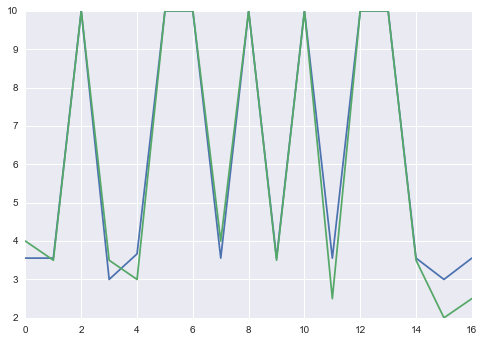

In [32]:
plt.plot(ypred)
plt.plot(y_test.values)

AttributeError: bins must increase monotonically.

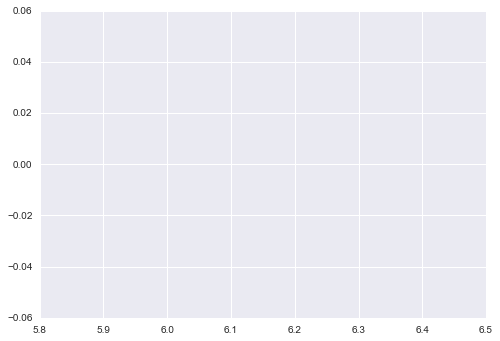

In [36]:
import seaborn as sns
sns.distplot(ypred, y_test.values)

## Exercise 5: IMDB Movies

Sometimes an API doesn't provide all the information we would like to get and we need to be creative.
Here we will use a combination of scraping and API calls to investigate the ratings and gross earnings of famous movies.

## 5.a Get top movies

The Internet Movie Database contains data about movies. Unfortunately it does not have a public API.

The page http://www.imdb.com/chart/top contains the list of the top 250 movies of all times. Retrieve the page using the requests library and then parse the html to obtain a list of the `movie_ids` for these movies. You can parse it with regular expression or using a library like `BeautifulSoup`.

**Hint:** movie_ids look like this: `tt2582802`

## 5.b Get top movies data

Although the Internet Movie Database does not have a public API, an open API exists at http://www.omdbapi.com.

Use this API to retrieve information about each of the 250 movies you have extracted in the previous step.
- Check the documentation of omdbapi.com to learn how to request movie data by id
- Define a function that returns a python object with all the information for a given id
- Iterate on all the IDs and store the results in a list of such objects
- Create a Pandas Dataframe from the list

## 5.c Get gross data

The OMDB API is great, but it does not provide information about Gross Revenue of the movie. We'll revert back to scraping for this.

- Write a function that retrieves the gross revenue from the entry page at imdb.com
- The function should handle the exception of when the page doesn't report gross revenue
- Retrieve the gross revenue for each movie and store it in a separate dataframe

## 5.d Data munging

- Now that you have movie information and gross revenue information, let's clean the two datasets.
- Check if there are null values. Be careful they may appear to be valid strings.
- Convert the columns to the appropriate formats. In particular handle:
    - Released
    - Runtime
    - year
    - imdbRating
    - imdbVotes
- Merge the data from the two datasets into a single one

## 5.d Text vectorization

There are several columns in the data that contain a comma separated list of items, for example the Genre column and the Actors column. Let's transform those to binary columns using the count vectorizer from scikit learn.

Append these columns to the merged dataframe.

**Hint:** In order to get the actors name right, you'll have to set the `token_pattern` parameter in `CountVectorizer` to u'(?u)\\w+\.?\\w?\.? \\w+'. Can you see why? How does this differ from the default?

## Bonus:

- What are the top 10 grossing movies?
- Who are the 10 actors that appear in the most movies?
- What's the average grossing of the movies in which each of these actors appear?
- What genre is the oldest movie?
